Giuseppe Galilei s295620

# Problem 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy

Single particle performing continuous time random walk with transition rate matrix P

In [2]:
#transition rate matrix
lambda_matrix=[[0,2/5,1/5,0,0],
   [0,0,3/4,1/4,0],
   [1/2,0,0,1/2,0],
   [0,0,1/3,0,2/3],
   [0,1/3,0,1/3,0]]

In [3]:
G=nx.DiGraph()
G.add_nodes_from(['o','a','b','c','d'])
G.add_edges_from([('o','a'),('o','b'),('a','b'),('a','c'),('b','o'),('b','c'),('c','b'),('c','d'),('d','a'),('d','c')])

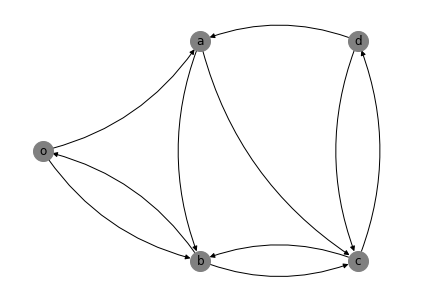

In [4]:
pos={'o': (0,1.5),'a': (1,3),'b': (1,0),'c': (2,0),'d': (2,3)}
nx.draw(G, pos, connectionstyle="arc3, rad=0.2", with_labels=True,node_color='grey',node_size=400)
plt.savefig("hw2_1.eps", format='eps')

In [5]:
nodeToInt={'o':0,'a':1,'b':2,'c':3,'d':4}

## A

In [6]:
def hittingTime_compute(lambda_matrix, pos_start, pos_dest_array, nodeToInt_dict, returnTime_compute=False):
    time_to_dest=0
    
    #if we are not computing return times, check if starting position is already in the destination array
    if returnTime_compute==False:
        if pos_start in pos_dest_array:
            return time_to_dest
        
    w = np.sum(lambda_matrix, axis=1)
    w_star = np.max(w)
    Q = lambda_matrix/w_star 
    Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))
    Q_cum = np.cumsum(Q, axis=1)
    
    t_next = -np.log(np.random.rand())/w_star

    pos_start=nodeToInt_dict[pos_start]
    pos_dest_array=list(map(lambda x: nodeToInt_dict[x], pos_dest_array))

    #initialize the starting position
    pos_pre=pos_start
    
    #here i just continue executing while i don't hit the destination
    while True:
        #choose new position
        pos_post = np.argwhere(Q_cum[pos_pre] > np.random.rand())[0][0]
        time_to_dest += t_next
        
        #check if arrived to destination
        if pos_post in pos_dest_array:
            return time_to_dest
        
        #compute next tick of the clock
        t_next = -np.log(np.random.rand())/w_star
        #update position
        pos_pre=pos_post
        

In [7]:
tot_time=0
for n in range (1, 100000):
    tot_time+=hittingTime_compute(lambda_matrix, 'a', ['a'], nodeToInt, returnTime_compute=True)
avg_time=tot_time/n
print("The average return time for node A is:", avg_time)

The average return time for node A is: 6.742411865918969


## B

The following formula was used:
$$
\mathbb{E}_{i}\left[\bar{T}_{i}^{+}\right]=\frac{1}{\omega_{i} \bar{\pi}_{i}}, \quad i \in \mathcal{X}
$$
where $\bar{T}_{i}^{+}=\inf \{t \geq 0: X(t)=i$ and $X(s) \neq i$ for some $s \in(0, t)\}$

In [8]:
print("The graph G is strongly connected:", nx.algorithms.components.is_strongly_connected(G))

The graph G is strongly connected: True


In [9]:
w = np.sum(lambda_matrix, axis=1)
w_star = np.max(w)
Q = lambda_matrix/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)

exp=1/(w*pi_bar)

print("The theoretical return time for node A is:", exp[1])

The theoretical return time for node A is: 6.750000000000008


## C

In [10]:
tot_time=0
for n in range (1, 100000):
    tot_time+=hittingTime_compute(lambda_matrix, 'o', ['d'], nodeToInt)
avg_time=tot_time/n
print("The average hitting time from node O to D is:",avg_time)

The average hitting time from node O to D is: 8.768414753042718


## D

If $\mathcal{S} \subseteq \mathcal{X}$ is a subset of states that is globally reachable in $G_{\Lambda}$, then

the expected hitting times
$$
\bar{\tau}_{i}^{S}=\mathbb{E}_{i}\left[T_{S}\right], \quad i \in \mathcal{X}
$$
are the unique solutions of
$$
\bar{\tau}_{s}^{S}=0, \quad s \in \mathcal{S}, \quad \bar{\tau}_{i}^{S}=\frac{1}{\omega_{i}}+\sum_{j \in \mathcal{X}} P_{i j} \bar{\tau}_{j}^{S}, \quad i \in \mathcal{X} \backslash \mathcal{S}
$$

The latter can be seen as 
$$
\bar{\tau}^{S}=\frac{1}{\omega}+Q\bar{\tau}^{S}
$$
Then 
$$
\bar{\tau}^{S}=(I-Q)^{-1}\frac{1}{\omega}
$$

In [11]:
n_nodes = 5
S = [4] 
R = [node for node in range(n_nodes) if node not in S]
w = np.sum(lambda_matrix, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ lambda_matrix


Q = P[np.ix_(R, R)]

tau_S = np.linalg.solve((np.identity(n_nodes-1)-Q),np.ones(n_nodes-1)/w[:4])

print("The theoretical hitting time from node O to D is:",tau_S[0] )

The theoretical hitting time from node O to D is: 8.785714285714285


# Part 2

## E

Study topology of the graph (number of sinks, aperiodicity,connected components)

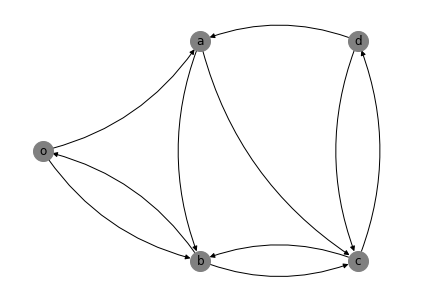

In [12]:
nx.draw(G, pos, connectionstyle="arc3, rad=0.2", with_labels=True,node_color='grey',node_size=400)
plt.savefig("hw2_1_e.eps", format='eps')

The graph is aperiodic= True
The condensation graph is made of only one connected component, we derive the graph is strongly connected


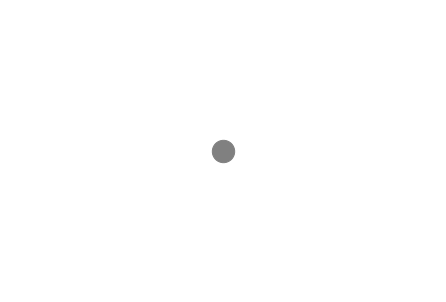

In [13]:
nx.draw(nx.condensation(G),node_color='grey',node_size=500)
print("The graph is aperiodic=", nx.algorithms.is_aperiodic(G))
print("The condensation graph is made of only one connected component, we derive the graph is strongly connected")

In [15]:
W = lambda_matrix
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W
w,v = np.linalg.eig(P.T)
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)

pi 0 = [0.13043478 0.17391304 0.26086957 0.26086957 0.17391304]


In [ ]:
# define initial condition
x = np.random.random(5)
x_0=x
for n in range(99):
    x = P @ x
print("x(100):", x, "\n")

print("Using the invariant distribution, the consensus value is", pi.T@x_0)

In [17]:
#theoretical consensus value and initial conditions
x = np.random.normal(0,1,5)
x_0=x
for n in range(99):
    x = P @ x
print("x(100):", x, "\n")

print("The initial condition is:", x_0)
print("Using the invariant distribution, the consensus value is", pi.T@x_0)

x(100): [0.10826088 0.10826088 0.10826088 0.10826088 0.10826088] 

The initial condition is: [ 0.74856242  0.0903823   0.19495301 -1.36592734  1.72715741]
Using the invariant distribution, the consensus value is 0.10826087745863233


## F

## F

The following formula is used to determine the theoretical variance
$$
\sigma_{\bar{x}}^{2}=\sigma^{2} \sum_{i} \pi_{i}^{2}
$$

In [19]:
# start with normally distributed initial states and run the dynamics
alfa_err = np.zeros(10000)

for i in range(10000):
    x = np.random.normal(0,1,5)
    for n in range(2000):
        x = P @ x
    alfa_err[i] = np.mean(x)*np.mean(x)

print("Variance of the node states:", 1)
print("Variance of the consensus state:", np.mean(alfa_err), "\n")
var_consensus=1*np.sum(np.power(pi,2))
print("The theoretical variance for consensus is:",var_consensus)

Variance of the node states: 1
Variance of the consensus state: 0.20928431107818002 

The theoretical variance for consensus is: 0.21361058601134214


In [ ]:
var_consensus=(1/12)*np.sum(np.power(pi,2))
print("The theoretical variance for consensus is:",var_consensus)

## G

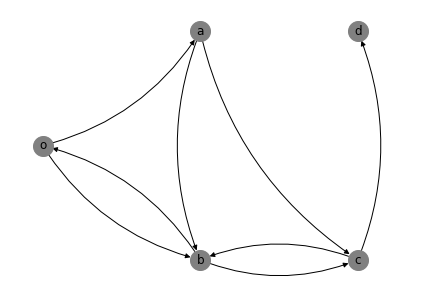

In [20]:
G1=copy.deepcopy(G)
W1=copy.deepcopy(W)

edges_toremove=[('d','a'),('d','c')]
G1.remove_edges_from(edges_toremove)
#update matrix
for edge in edges_toremove:
    W1[nodeToInt[edge[0]]][nodeToInt[edge[1]]]=0

nx.draw(G1, pos, connectionstyle="arc3, rad=0.2", with_labels=True,node_color='grey',node_size=400)
plt.savefig("hw2_1_g.eps", format='eps')

Now node D is a sink, we get proof of that by analysing the connected components

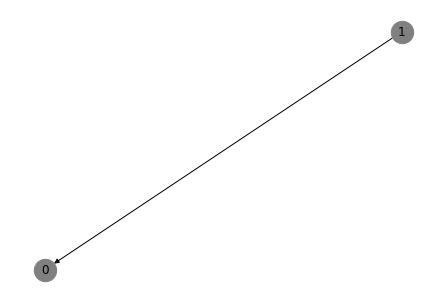

In [21]:
nx.draw(nx.condensation(G1),node_color='grey',node_size=500, with_labels=True)

In [22]:
#add self loop on node D
G1.add_edge('d','d')
W1[nodeToInt['d']][nodeToInt['d']]=1

In [23]:
degrees = np.sum(W1,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W1
w,v = np.linalg.eig(P.T)
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)

pi 0 = [0. 0. 0. 0. 1.]


In [24]:
#theoretical consensus value and initial conditions
x = np.random.random(5)
x_0=x
for n in range(99):
    x = P @ x
print("x(100):", x, "\n")

print("The initial condition is:", x_0)
print("Using the invariant distribution, the consensus value is", pi.T@x_0)

x(100): [0.87195809 0.87195809 0.87195809 0.87195809 0.87195809] 

The initial condition is: [0.66789878 0.56482793 0.53513582 0.77707701 0.87195809]
Using the invariant distribution, the consensus value is 0.8719580865941438


We can see how all nodes converged to the state of the sink d

In [25]:
# start with random normally distributed initial states and run the dynamics
alfa_err = np.zeros(1000)

for i in range(1000):
    x = np.random.normal(0,1,5)
    for n in range(1000):
        x = P @ x
    alfa_err[i] = np.mean(x)*np.mean(x)

print("Variance of the node states:", 1)
print("Variance of the consensus state:", np.mean(alfa_err), "\n")
var_consensus=(np.sum(np.power(pi,2)))
print("The theoretical variance for consensus is:",var_consensus)

Variance of the node states: 1
Variance of the consensus state: 1.0615237278161278 

The theoretical variance for consensus is: 1.0


## H

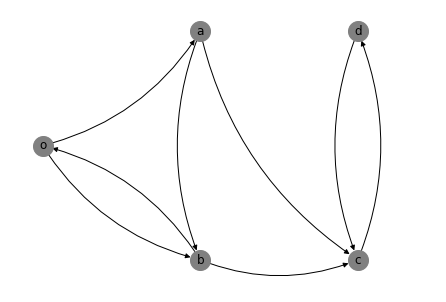

In [26]:
G2=copy.deepcopy(G)
W2=copy.deepcopy(W)

edges_toremove=[('d','a'),('c','b')]
G2.remove_edges_from(edges_toremove)
#update matrix
for edge in edges_toremove:
    W2[nodeToInt[edge[0]]][nodeToInt[edge[1]]]=0

nx.draw(G2, pos, connectionstyle="arc3, rad=0.2", with_labels=True,node_color='grey',node_size=400)
plt.savefig("hw2_1_h.eps", format='eps')

In [27]:
degrees = np.sum(W2,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W2
w,v = np.linalg.eig(P.T)
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real 
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)

pi 0 = [-5.30655074e-16 -4.14666885e-16 -6.14043219e-16  5.00000000e-01
  5.00000000e-01]


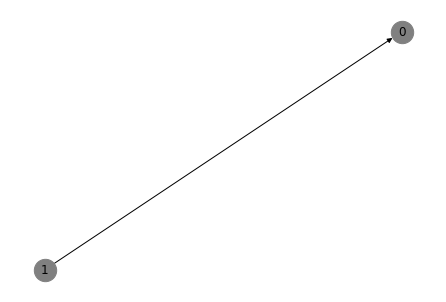

In [28]:
nx.draw(nx.condensation(G2),node_color='grey',node_size=500, with_labels=True)

In [29]:
#theoretical consensus value and initial conditions
x = np.random.random(5)
x_0=x
for n in range(100000):
    x = P @ x
print("x(100):", x, "\n")

print("The initial condition is:", x_0)

x(100): [0.49598544 0.48671838 0.57012197 0.38478065 0.62572437] 

The initial condition is: [0.72531773 0.49963148 0.01566867 0.38478065 0.62572437]


This time the sink component is composed of nodes c and d, it is not aperiodic, so we don't arrive to consensus